In [1]:
import appart_reduction as ar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df_rent = pd.read_csv('../../data/rent.csv', sep=';', encoding='utf-8')
df_rent = df_rent[(df_rent['surface'].notna()) & (df_rent['furnished'].notna())]
df_rent.reset_index(drop=True, inplace=True)

df_pca, cumulative_variance, explained_variance = ar.get_pca_components(df_rent)
df_rent

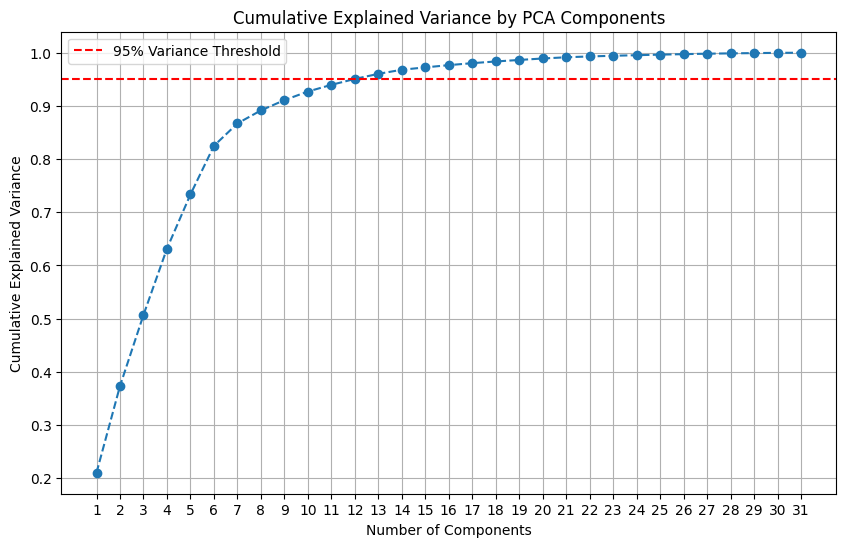

In [34]:
# Plotting the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.grid()
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.legend()

In [35]:
df_pca['price'] = df_rent['price']
df_pca['price_m2'] = df_rent['price_m2']
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,price,price_m2
0,-1.471971,0.400547,-0.754102,0.303884,-0.675914,0.763856,0.733428,0.249088,-0.127086,0.084794,...,0.013121,-0.014553,0.007766,-0.002506,0.021993,0.004907,-0.006011,0.011212,500.0,55.555556
1,-1.299015,0.058771,0.276426,0.005294,0.270633,0.196565,0.671360,-0.267999,-0.402933,-0.134787,...,0.006867,0.036072,0.041665,0.035728,-0.003350,-0.002287,0.003361,0.006937,500.0,45.454545
2,-1.685637,1.012013,1.383988,0.468968,-1.118169,-0.583986,0.817666,0.544921,-0.161921,0.069224,...,-0.044810,0.006559,-0.037471,0.012171,0.015543,-0.005808,0.000159,-0.011469,500.0,71.428571
3,-1.362417,0.021741,0.080275,0.072302,0.126281,0.162680,0.628498,-0.099220,-0.278477,0.087710,...,0.021011,0.014231,0.009689,0.040629,0.016532,0.016752,0.002722,-0.013912,500.0,50.000000
4,-1.288662,1.040258,0.010574,-0.577608,0.037002,1.133383,0.753626,-0.019227,0.334978,0.044115,...,-0.061146,-0.011321,-0.026099,0.011121,-0.000931,0.001764,-0.013533,0.008512,500.0,55.555556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,1.016213,-1.204167,0.459664,0.337042,0.047545,-0.817487,0.640992,-0.277295,-0.109378,-0.218413,...,0.022911,-0.023323,-0.007750,-0.024394,0.029044,-0.003574,-0.004001,-0.001677,1500.0,50.000000
1094,1.976261,-0.964031,-0.318351,0.422278,-1.032862,-0.111315,-0.180544,-0.016288,-0.514994,-0.368604,...,0.032740,-0.046718,0.009114,-0.019657,0.063658,0.012705,-0.006072,0.011796,1500.0,33.333333
1095,0.855571,-0.881584,0.367460,0.201573,0.002114,-0.572743,0.749739,-0.145644,0.356534,-0.107267,...,0.018601,-0.015304,-0.000670,-0.023157,0.030209,-0.009373,0.001413,-0.002501,1500.0,55.555556
1096,-0.311044,-0.844911,0.496477,-0.641034,1.388493,0.128662,-0.531506,-0.175233,0.376707,-0.237034,...,0.038193,-0.062728,-0.050852,-0.025489,-0.023036,0.011027,0.020006,0.010137,1500.0,57.692308


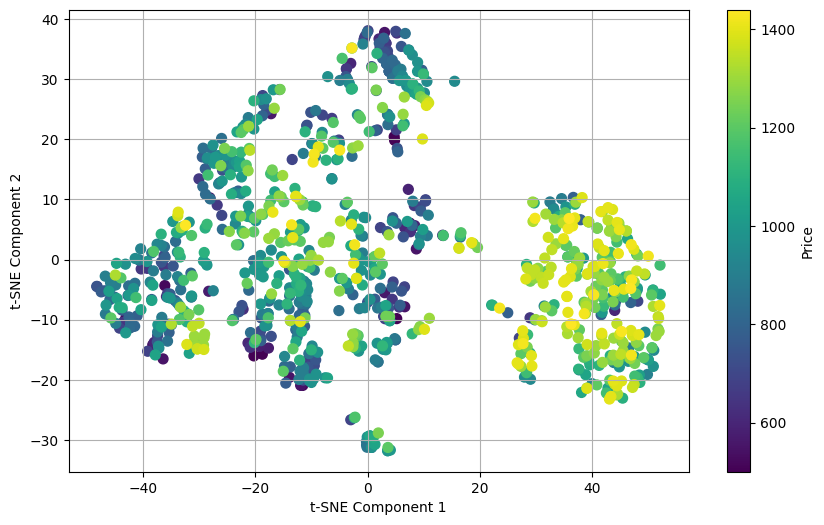

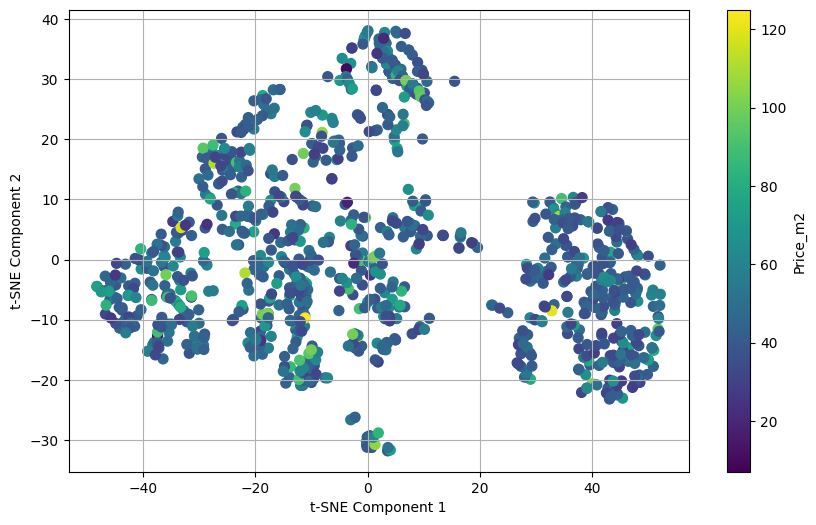

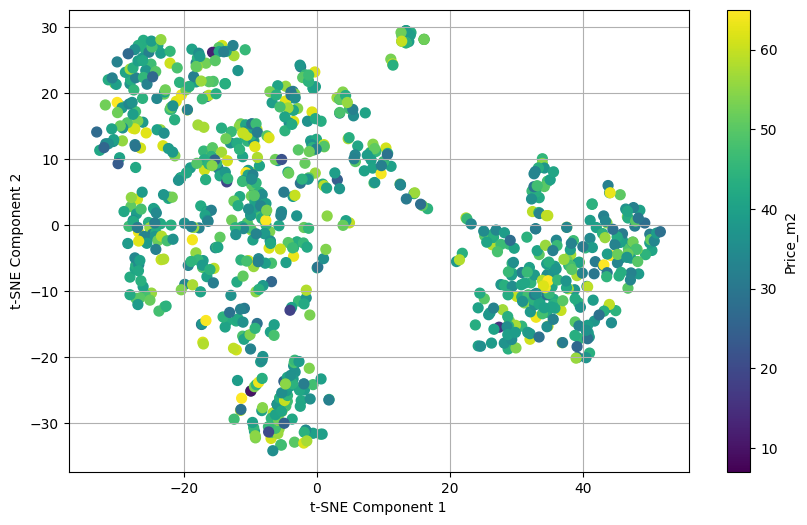

In [9]:
from sklearn.manifold import TSNE

def plot_tsne_from_pca(df_pca, perplexity=30, color='price'):
    """
    Plot t-SNE from PCA components.
    
    Parameters:
    df_pca (DataFrame): DataFrame containing PCA components.
    perplexity (int): Perplexity parameter for t-SNE.
    """
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    pca_col = [col for col in df_pca.columns if col.startswith('PC')]
    tsne_results = tsne.fit_transform(df_pca[pca_col])
    plt.figure(figsize=(10, 6))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=df_pca[color], cmap='viridis', s=50)
    plt.colorbar(label=color.capitalize())
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.grid()
    plt.show()

# Plotting t-SNE from PCA components
plot_tsne_from_pca(df_pca, perplexity=30, color='price')
df_pca['price_m2'] = df_rent['price_m2']
# Plotting t-SNE from PCA components with price per m2
plot_tsne_from_pca(df_pca, perplexity=30, color='price_m2')

plot_tsne_from_pca(df_pca[df_pca['price_m2'] <= 65], perplexity=30, color='price_m2')

In [44]:
from sklearn.neighbors import NearestNeighbors

def find_nearest_neighbors(df_pca, index, radius):
    
    pca_col = [col for col in df_pca.columns if col.startswith('PC')]
    neighbors = NearestNeighbors(radius=radius, metric='euclidean')
    neighbors.fit(df_pca[pca_col])
    distances, indices = neighbors.radius_neighbors(df_pca[pca_col].iloc[[index]])
    return distances[0], indices[0]

distances, indices = find_nearest_neighbors(df_pca, 50, radius=1.05)
df_rent.iloc[indices]


,list_id,type,first_publication_date,zipcode,district_id,price,charges_included,furnished,surface,price_m2,...,specificities_Construction ancienne,specificities_Construction récente,specificities_Cuisine ouverte,specificities_Cuisine équipée,specificities_Grenier,specificities_Plusieurs toilettes,specificities_Sous-sol,outside_access_Balcon,outside_access_Jardin,outside_access_Terrasse
10,2907021458,Appartement,2024-12-22 07:03:00,75015,75115.0,550.0,1,1.0,14.0,39.285714,...,False,False,False,False,False,False,False,False,False,False
17,2903103711,Appartement,2024-12-14 15:26:00,75014,3000156.0,555.0,1,1.0,13.0,42.692308,...,False,False,False,False,False,False,False,False,False,False
23,2878660833,Appartement,2024-11-07 08:02:00,75005,100548.0,580.0,1,1.0,13.0,44.615385,...,False,False,False,False,False,False,False,False,False,False
38,2904762566,Appartement,2024-12-17 12:20:00,75016,3000114.0,630.0,1,1.0,15.0,42.000000,...,False,False,False,False,False,False,False,False,False,False
42,2883453489,Appartement,2024-11-15 11:32:00,75010,75110.0,637.0,1,1.0,16.0,39.812500,...,False,False,False,False,False,False,False,False,False,False
43,2919418897,Appartement,2025-01-15 11:09:00,75010,100519.0,640.0,1,1.0,15.0,42.666667,...,False,False,False,False,False,False,False,False,False,False
44,2923502633,Appartement,2025-01-22 10:06:00,75014,3000156.0,640.0,1,1.0,15.0,42.666667,...,False,False,False,False,False,False,False,False,False,False
50,2892123892,Appartement,2024-11-27 17:23:00,75013,75113.0,650.0,1,1.0,12.0,54.166667,...,False,False,False,False,False,False,False,False,False,False
62,2890885389,Appartement,2024-11-25 14:25:00,75017,3000192.0,660.0,1,1.0,17.0,38.823529,...,False,False,False,False,False,False,False,False,False,False
67,2874491962,Appartement,2024-10-31 15:12:00,75017,3000118.0,676.0,1,1.0,17.0,39.764706,...,False,False,False,False,False,False,False,False,False,False


In [51]:
df_rent.iloc[50]

list_id                                                                                2892123892
type                                                                                  Appartement
first_publication_date                                                        2024-11-27 17:23:00
zipcode                                                                                     75013
district_id                                                                               75113.0
price                                                                                       650.0
charges_included                                                                                1
furnished                                                                                     1.0
surface                                                                                      12.0
price_m2                                                                                54.166667
nb_rooms            

In [50]:
from sklearn.metrics import pairwise_distances

def weighted_nearest_neighbors(df_pca, df_rent, index, alpha=1.0, beta=1.0, k=5):

    assert (df_pca.index == df_rent.index).all(), "Les index doivent être alignés"
    
    # Extraire les données nécessaires
    pca_cols = [col for col in df_pca.columns if col.startswith('PC')]
    X_pca = df_pca[pca_cols].values
    X_geo = df_rent[['longitude', 'latitude']].values

    # Normalisation (optionnel mais recommandé)
    X_geo = (X_geo - X_geo.mean(axis=0)) / X_geo.std(axis=0)
    X_pca = (X_pca - X_pca.mean(axis=0)) / X_pca.std(axis=0)

    # Calcul des distances par rapport au point cible
    i = df_pca.index.get_loc(index)
    dist_pca = pairwise_distances([X_pca[i]], X_pca)[0]
    dist_geo = pairwise_distances([X_geo[i]], X_geo)[0]

    # Distance pondérée
    dist_total = alpha * dist_pca + beta * dist_geo

    # Exclure le point lui-même
    dist_total[i] = np.inf

    # Trouver les k plus proches voisins
    nearest_indices = np.argsort(dist_total)[:k]
    nearest_distances = dist_total[nearest_indices]

    return df_rent.iloc[nearest_indices], nearest_distances

df_closest, _ = weighted_nearest_neighbors(df_pca, df_rent, 50, alpha=0.4, beta=0.6, k=10)
df_closest

,list_id,type,first_publication_date,zipcode,district_id,price,charges_included,furnished,surface,price_m2,...,specificities_Construction ancienne,specificities_Construction récente,specificities_Cuisine ouverte,specificities_Cuisine équipée,specificities_Grenier,specificities_Plusieurs toilettes,specificities_Sous-sol,outside_access_Balcon,outside_access_Jardin,outside_access_Terrasse
114,2934703050,Appartement,2025-02-11 10:19:24,75013,3000170.0,740.0,1,1.0,12.0,61.666667,...,False,False,False,False,False,False,False,False,False,False
79,2891831434,Appartement,2024-11-27 12:02:00,75014,75114.0,690.0,1,1.0,14.0,49.285714,...,False,False,False,False,False,False,False,False,False,False
699,2916505207,Appartement,2025-01-10 07:51:00,75013,75113.0,1200.0,1,1.0,27.0,44.444444,...,False,False,False,False,False,False,False,False,False,False
116,2932635125,Appartement,2025-02-07 19:32:32,75013,3000170.0,740.0,1,1.0,12.0,61.666667,...,False,False,False,False,False,False,False,False,False,False
552,2926966019,Appartement,2025-01-28 14:00:50,75013,3000166.0,1050.0,1,1.0,18.0,58.333333,...,False,False,False,False,False,False,False,False,False,False
155,2895627820,Appartement,2024-12-03 10:19:00,75013,3000170.0,780.0,1,1.0,20.0,39.000000,...,False,False,False,False,False,False,False,False,False,False
776,2928196173,Appartement,2025-01-30 18:49:34,75013,3000167.0,1250.0,1,1.0,20.0,62.500000,...,False,False,False,False,False,False,False,False,False,False
763,2934085591,Appartement,2025-02-09 18:49:00,75013,3000167.0,1250.0,1,1.0,13.0,96.153846,...,False,False,False,False,False,False,False,False,False,False
693,2934106934,Appartement,2025-02-05 21:48:00,75013,3000170.0,1190.0,1,1.0,23.0,51.739130,...,False,False,False,False,False,False,False,False,False,False
10,2907021458,Appartement,2024-12-22 07:03:00,75015,75115.0,550.0,1,1.0,14.0,39.285714,...,False,False,False,False,False,False,False,False,False,False
